In [2]:
from pathlib import Path
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [3]:
def read_pickle_files(folder_path):
    results = []  # Initialize an empty list to store the results
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                data = pd.read_pickle(file)
                # Do something with the data from the pickle file
                results.append(data)  # Append the data to the results list

    return results  # Return the list of results

def find_species_folders(path, species):
    files = glob.glob(path + '/*')
    result = []
    for file in files:
        if species in file and not file.endswith('.csv') and 'old_human' not in file:
            result.append(file)
    return result


In [4]:
def get_species_cross_val_data(cross_val_path, species):
    # Create an empty list to store the dataframes
    dataframes = []

    # Iterate over each iteration
    for path in find_species_folders(cross_val_path, species):
        # read all .pkl files in the folder
        files = read_pickle_files(path)
        # Extract 'P_ID' and 'mean_test_loss' from each element in the list
        folder = os.path.basename(path)
        folder_name = folder.split("cross_validation_")[1]  # Extract the portion after "human_cross_validation_"
        extracted_data = [
            {'P_ID': element['P_ID'], folder_name + '_mean_test_loss': element['mean_test_loss']}
            for element in files]

        # Create a dataframe from the extracted data
        df = pd.DataFrame(extracted_data)

        # Append the dataframe to the list
        dataframes.append(df)

    # Merge the dataframes based on 'P_ID' column
    merged_df = dataframes[0]
    for i in range(1, len(dataframes)):
        merged_df = pd.merge(merged_df, dataframes[i], on='P_ID', how='outer')
    # add a species column
    merged_df['Species'] = species

    return merged_df

In [5]:
# vertical concatenation of all species
species = [
           'human', 
           'rat', 
           'mouse'
           ]
df = pd.DataFrame()
for i in range(0, len(species)):
    df = pd.concat([df, get_species_cross_val_data(cross_val_path = '/Users/quentin/Desktop/HeadFixedBehavior/Data/Cross_Validation',
                                                   species = species[i])])

In [6]:
df

,P_ID,Boundary_repulsion_mean_test_loss,Bayesian_repulsion_mean_test_loss,Bayesian_no_repulsion_mean_test_loss,Boundary_no_repulsion_mean_test_loss,Species
0,6251b4cb93d053f7e4b0e9c6,0.077146,0.073994,0.062540,0.094215,human
1,6250b85007ef503f28f9e20f,0.037108,0.050527,0.032858,0.048302,human
2,62e136b799f693c75553a70a,0.166824,0.075869,0.107682,0.145522,human
3,6251b4b3afcbfe708ef74f35,0.060804,0.050670,0.039802,0.069529,human
4,6251a939016ee3ba2678e165,0.059862,0.081581,0.065802,0.067708,human
5,6250c1d510e1abd7b05b275c,0.032905,0.031094,0.029256,0.041355,human
6,6251b64f4214d651349d95fd,0.032512,0.035275,0.047753,0.040189,human
7,62e07514b3e1364ad8cfabb5,0.100051,0.145009,0.100645,0.095558,human
8,62508968f88fc4ead9a3d49a,0.040107,0.028383,0.034736,0.058892,human
9,62e095274855ad1baadc09ce,0.129929,0.125415,0.122684,0.178727,human


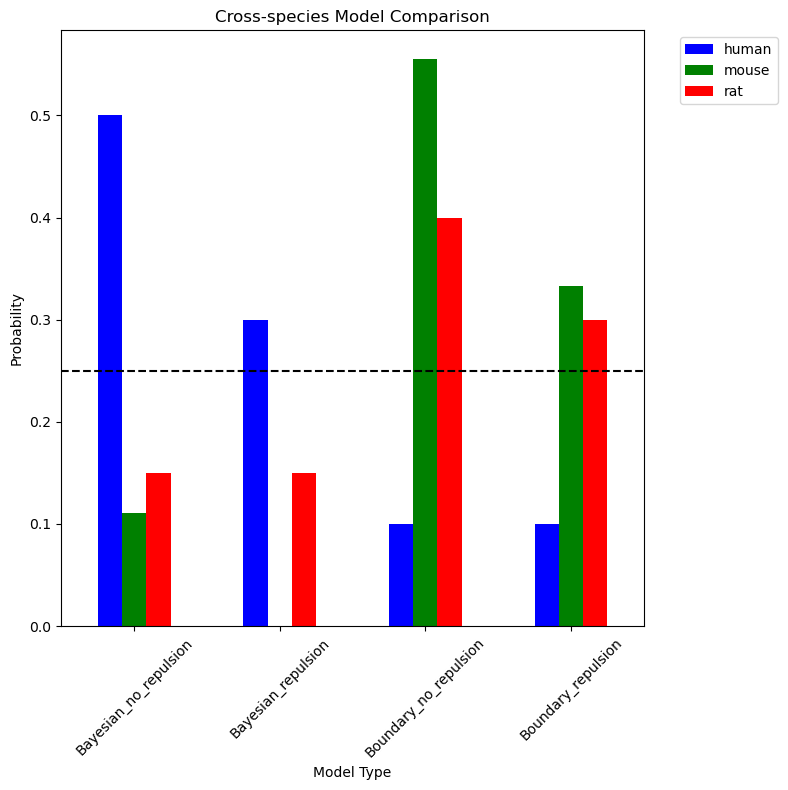

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df' with the data

# Find the model with the lowest mean test loss for each participant
df['Lowest_Model'] = df[['Boundary_repulsion_mean_test_loss',
                         'Boundary_no_repulsion_mean_test_loss',
                         'Bayesian_repulsion_mean_test_loss',
                         'Bayesian_no_repulsion_mean_test_loss']].idxmin(axis=1)

# remove the '_mean_test_loss' from the model name
df['Lowest_Model'] = df['Lowest_Model'].str.replace('_mean_test_loss', '')

# Count the occurrences of each model and species
species_model_counts = df.groupby(['Lowest_Model', 'Species']).size().unstack()

# Normalize the counts to probabilities
# species_model_probs = species_model_counts.div(species_model_counts.sum(axis=1), axis=0)
column_sums = species_model_counts.sum()
species_model_probs = species_model_counts.div(column_sums, axis=1)

# Create a bar chart with different colored bars for each species and model
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

# Set plot size to 8x8
fig, ax = plt.subplots(figsize=(8, 8))

species_model_probs.plot(kind='bar', color=colors, ax=ax)

# Change the x-ticks to show only the model name
model_names = [model.replace('_mean_test_loss', '') for model in species_model_counts.index]
plt.xticks(range(len(model_names)), model_names, rotation=45)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the chart title and axis labels
plt.title('Cross-species Model Comparison')
plt.xlabel('Model Type')
plt.ylabel('Probability')

# add horizontal line at 0.25
plt.axhline(y=0.25, color='k', linestyle='--')

plt.tight_layout()

# save as pdf
plt.savefig('/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/Species_Cross_Val_Comp_Bar.pdf', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()


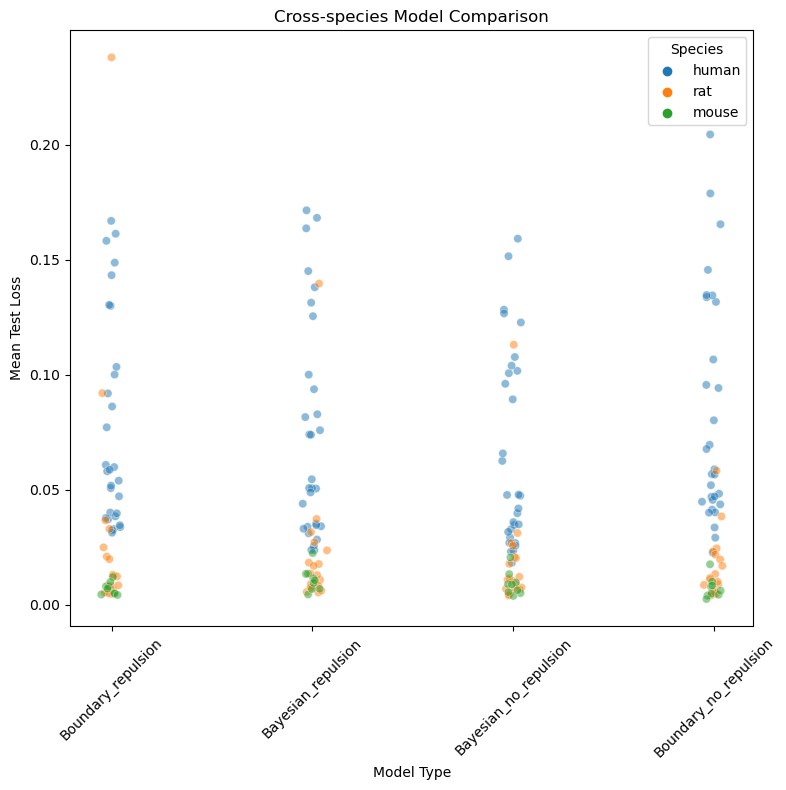

In [8]:
# Melt the DataFrame to have a long format
df_melted = df.melt(id_vars=['P_ID', 'Species'],
                    value_vars=['Boundary_repulsion_mean_test_loss',
                                'Bayesian_repulsion_mean_test_loss',
                                'Bayesian_no_repulsion_mean_test_loss',
                                'Boundary_no_repulsion_mean_test_loss'],
                    var_name='Model',
                    value_name='Mean_Test_Loss')

# Define a mapping for the models to numerical values
model_mapping = {'Boundary_repulsion_mean_test_loss': 0,
                 'Bayesian_repulsion_mean_test_loss': 1,
                 'Bayesian_no_repulsion_mean_test_loss': 2,
                 'Boundary_no_repulsion_mean_test_loss': 3}

# Apply the mapping and add Gaussian noise
df_melted['X_Pos'] = df_melted['Model'].map(model_mapping)
df_melted['X_Pos'] += np.random.normal(loc=0, scale=0.025, size=len(df_melted))

# remove the '_mean_test_loss' from the model name
df_melted['Model'] = df_melted['Model'].str.replace('_mean_test_loss', '')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='X_Pos', y='Mean_Test_Loss', hue='Species', data=df_melted, alpha=0.5)
plt.xticks(ticks=list(model_mapping.values()), labels=df_melted.Model.unique(), rotation=45)
plt.xlabel('Model Type')
plt.ylabel('Mean Test Loss') 
plt.title('Cross-species Model Comparison')
plt.tight_layout()
# save as pdf
plt.savefig('/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/Species_Cross_Val_Comp_Scatter.pdf', bbox_inches='tight', dpi=300)
plt.show()


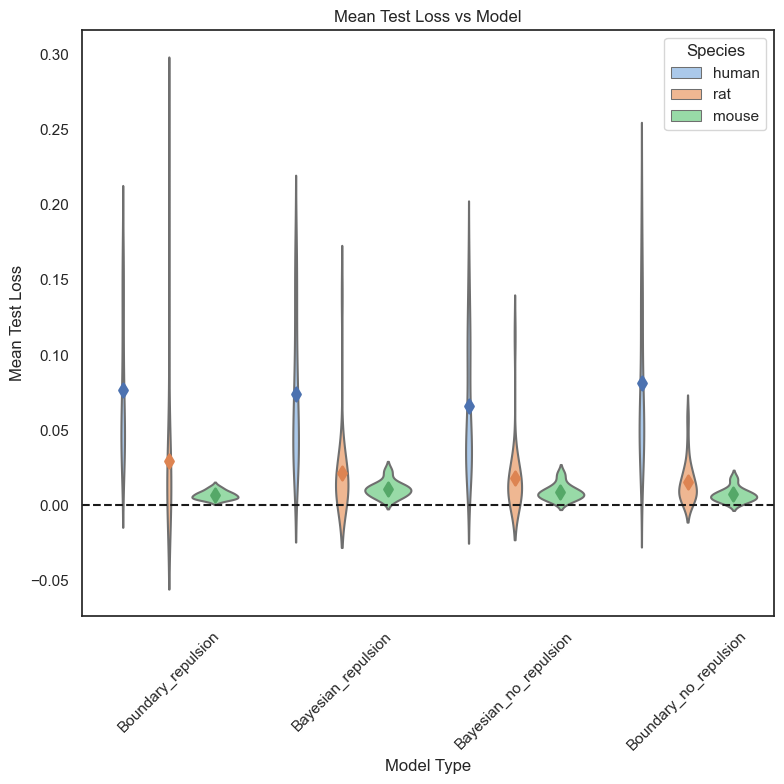

In [57]:
df_melted['Mean_Test_Loss'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_melted.dropna(subset=['Mean_Test_Loss'], inplace=True)

# Dodge value
dodge_value = 0.53

# Violin plot
plt.figure(figsize=(8,8))
sns.violinplot(x='Model', y='Mean_Test_Loss', data=df_melted, hue='Species', inner=None, palette="pastel", dodge=dodge_value)
# Save current legend
current_legend = plt.gca().get_legend()

sns.pointplot(x='Model', y='Mean_Test_Loss', data=df_melted, hue='Species', dodge=dodge_value, markers="d", scale=1, errorbar=None, join=False)
# Remove pointplot legend
plt.gca().get_legend().remove()
# Add back the saved violin plot legend
plt.gca().add_artist(current_legend)
# add horizontal line at 0
plt.axhline(y=0, color='k', linestyle='--')
# rotate x-ticks
plt.xticks(rotation=45)
plt.xlabel('Model Type')
plt.ylabel('Mean Test Loss')
plt.title('Mean Test Loss vs Model')
plt.tight_layout()
# save as pdf
plt.savefig('/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/Species_Cross_Val_Comp_Violin.pdf', bbox_inches='tight', dpi=300)
plt.show()



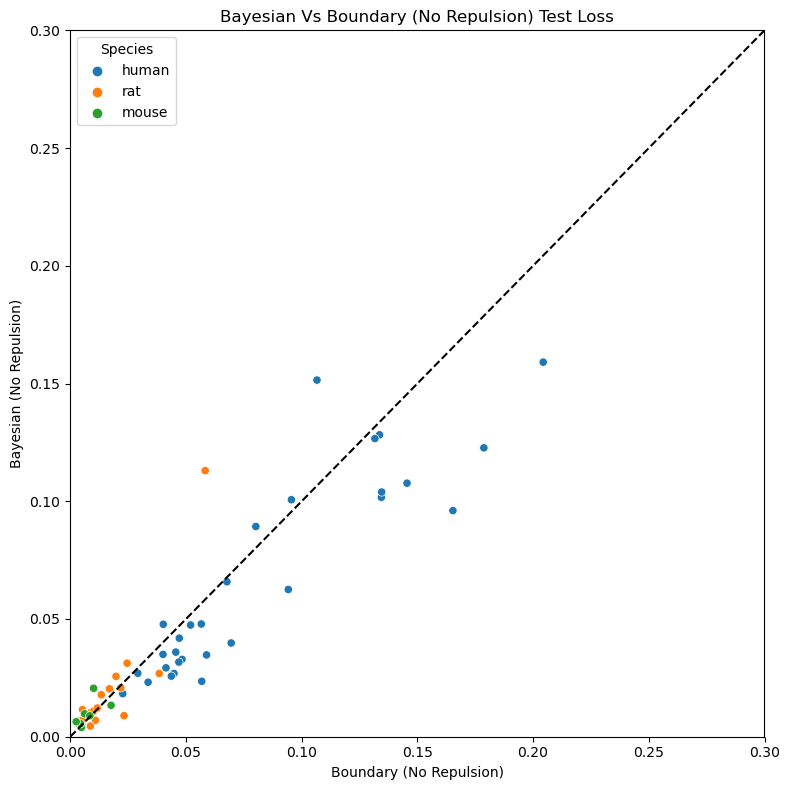

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Boundary_no_repulsion_mean_test_loss', 
                y='Bayesian_no_repulsion_mean_test_loss', 
                hue='Species', 
                data=df)
plt.xlim(0, 0.3)
plt.ylim(0, 0.3)
# add diagonal line
plt.plot([0, 0.3], [0, 0.3], color='k', linestyle='--')
plt.xlabel('Boundary (No Repulsion)')
plt.ylabel('Bayesian (No Repulsion)')
plt.title('Bayesian Vs Boundary (No Repulsion) Test Loss')
plt.tight_layout()
# save as pdf
plt.savefig('/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/Species_Cross_Val_Comp_Scatter_BoundaryVsBayesian.pdf', bbox_inches='tight', dpi=300)
plt.show()


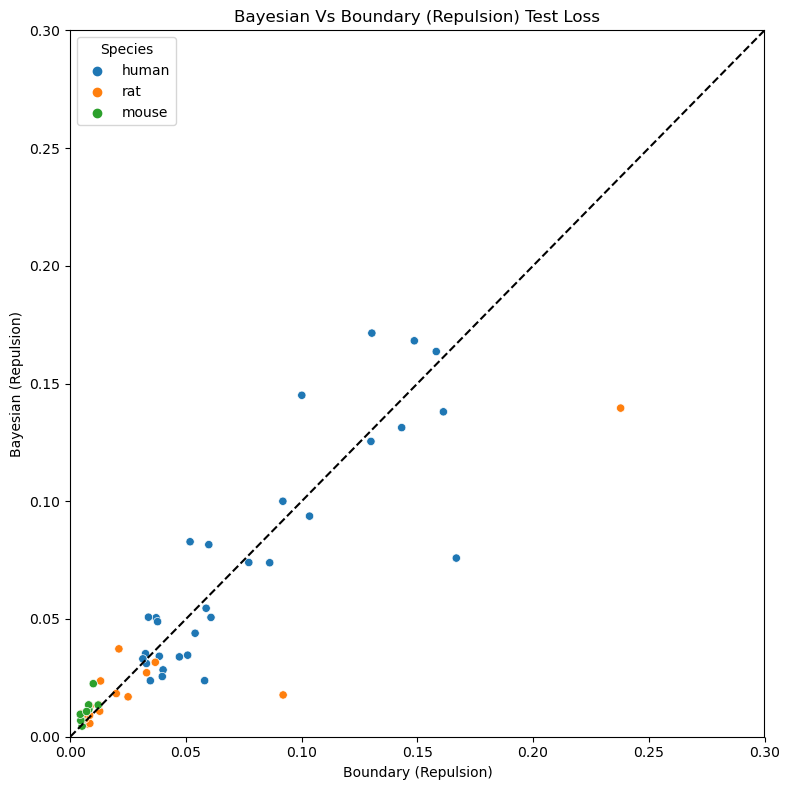

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Boundary_repulsion_mean_test_loss', 
                y='Bayesian_repulsion_mean_test_loss', 
                hue='Species', 
                data=df)
plt.xlim(0, 0.3)
plt.ylim(0, 0.3)
# add diagonal line
plt.plot([0, 0.3], [0, 0.3], color='k', linestyle='--')
plt.xlabel('Boundary (Repulsion)')
plt.ylabel('Bayesian (Repulsion)')
plt.title('Bayesian Vs Boundary (Repulsion) Test Loss')
plt.tight_layout()
# save as pdf
plt.savefig('/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/Species_Cross_Val_Comp_Scatter_BoundaryVsBayesian_Repulsion.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# generate fake data for the 4 models
# Create a list of participant 
participants = df.P_ID.unique()
# Generate fake data for the three models
np.random.seed(42)

data = {
    'P_ID': participants,
    # 'Boundary_repulsion_mean_test_loss': df.Boundary_repulsion_mean_test_loss.values,
    'Boundary_repulsion_mean_test_loss': np.random.uniform(low=1, high=2.5, size=len(participants)),
    'Boundary_no_repulsion_mean_test_loss': np.random.uniform(low=1, high=2.5, size=len(participants)),
    'Bayesian_repulsion_mean_test_loss': np.random.uniform(low=1, high=2.5, size=len(participants)),
    'Bayesian_no_repulsion_mean_test_loss': np.random.uniform(low=1, high=2.5, size=len(participants))
}

df = pd.DataFrame(data)
df.head()

,P_ID,Boundary_repulsion_mean_test_loss,Boundary_no_repulsion_mean_test_loss,Bayesian_repulsion_mean_test_loss,Bayesian_no_repulsion_mean_test_loss
0,6251b4cb93d053f7e4b0e9c6,1.561810,1.487995,2.338838,1.580103
1,6250b85007ef503f28f9e20f,2.426071,1.583016,1.809013,2.405095
2,62e136b799f693c75553a70a,2.097991,1.407024,2.211160,1.206281
3,6251b4b3afcbfe708ef74f35,1.897988,2.243106,2.344137,1.511600
4,6251a939016ee3ba2678e165,1.234028,1.535130,1.477005,1.170210


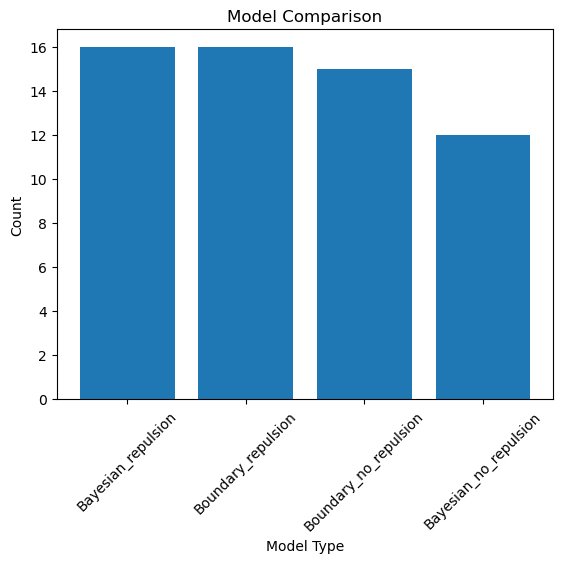

In [ ]:
# Find the model with the lowest mean test loss for each participant
df['Lowest_Model'] = df[['Boundary_repulsion_mean_test_loss',
                         'Boundary_no_repulsion_mean_test_loss', 
                         'Bayesian_repulsion_mean_test_loss', 
                         'Bayesian_no_repulsion_mean_test_loss']].idxmin(axis=1)

# Count the occurrences of each model
model_counts = df['Lowest_Model'].value_counts()

# Create a bar chart
plt.bar(model_counts.index, model_counts.values)

# Set the chart title and axis labels
plt.title('Model Comparison')
plt.xlabel('Model Type')
plt.ylabel('Count')

# x-ticks to just show the model name
plt.xticks(model_counts.index, model_counts.index.str.replace('_mean_test_loss', ''))
# rotate the x-ticks
plt.xticks(rotation=45)


# Show the plot
plt.show()


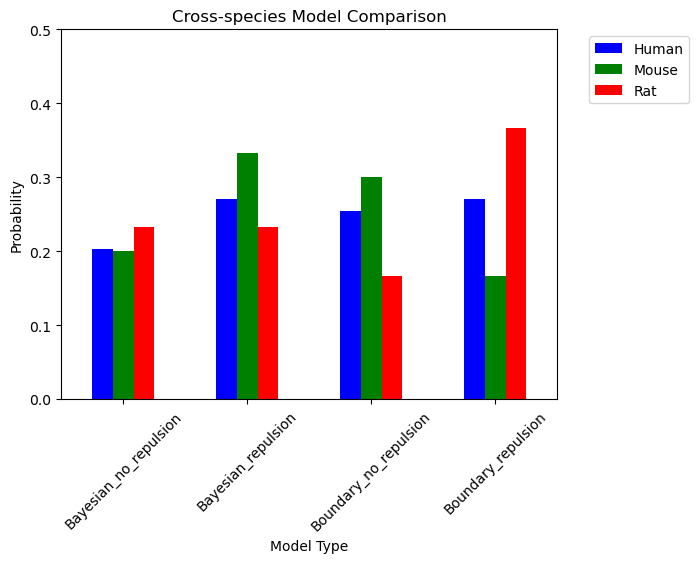

In [ ]:
# Generate fake data for 30 rats and 30 mice
np.random.seed(42)

rat_data = {
    'P_ID': ['rat_' + str(i) for i in range(1, 31)],
    'Boundary_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Boundary_no_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Bayesian_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Bayesian_no_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30)
}

mouse_data = {
    'P_ID': ['mouse_' + str(i) for i in range(1, 31)],
    'Boundary_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Boundary_no_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Bayesian_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30),
    'Bayesian_no_repulsion_mean_test_loss': np.random.uniform(low=0, high=1, size=30)
}

rat_df = pd.DataFrame(rat_data)
mouse_df = pd.DataFrame(mouse_data)

# Concatenate the human, rat, and mouse DataFrames
combined_df = pd.concat([df, rat_df, mouse_df], ignore_index=True)

# Create a new column 'Species' to differentiate the species
combined_df['Species'] = ['Human'] * len(df) + ['Rat'] * len(rat_df) + ['Mouse'] * len(mouse_df)

# Find the model with the lowest mean test loss for each participant
combined_df['Lowest_Model'] = combined_df[['Boundary_repulsion_mean_test_loss', 
                                           'Boundary_no_repulsion_mean_test_loss', 
                                           'Bayesian_repulsion_mean_test_loss', 
                                           'Bayesian_no_repulsion_mean_test_loss']].idxmin(axis=1)

# Count the occurrences of each model and species
species_model_counts = combined_df.groupby(['Lowest_Model', 'Species']).size().unstack()

# Normalize the counts to probabilities
species_model_probs = species_model_counts.div(species_model_counts.sum(axis=0), axis=1)

# Create a bar chart with different colored bars for each species and model
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

species_model_probs.plot(kind='bar', color=colors)

# Change the x-ticks to show only the model name
model_names = [model.replace('_mean_test_loss', '') for model in species_model_counts.index]
plt.xticks(range(len(model_names)), model_names)

# y-axis from 0 to 1
plt.ylim((0, 0.5))

# rotate the x-ticks
plt.xticks(rotation=45)

# move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the chart title and axis labels
plt.title('Cross-species Model Comparison')
plt.xlabel('Model Type')
plt.ylabel('Probability')

# Show the plot
plt.show()

# Error bars with Normal Approximation Method

In [ ]:
# # Calculate s.e. column
# def calculate_se(p, n):
#     return np.sqrt((p * (1 - p)) / n)

# # Calculate CI lower and upper bounds
# def calculate_ci_lower(p, se):
#     return p - 1.96 * se

# def calculate_ci_upper(p, se):
#     return p + 1.96 * se

# # Add s.e. column for each species
# species_model_probs['SE_Human'] = calculate_se(species_model_probs['Human'], n)  # Replace n with the appropriate value
# species_model_probs['SE_Mouse'] = calculate_se(species_model_probs['Mouse'], n)  # Replace n with the appropriate value
# species_model_probs['SE_Rat'] = calculate_se(species_model_probs['Rat'], n)  # Replace n with the appropriate value

# # Add lower and upper bounds of the 95% confidence interval for each species
# species_model_probs['CI_Lower_Human'] = calculate_ci_lower(species_model_probs['Human'], species_model_probs['SE_Human'])
# species_model_probs['CI_Upper_Human'] = calculate_ci_upper(species_model_probs['Human'], species_model_probs['SE_Human'])

# species_model_probs['CI_Lower_Mouse'] = calculate_ci_lower(species_model_probs['Mouse'], species_model_probs['SE_Mouse'])
# species_model_probs['CI_Upper_Mouse'] = calculate_ci_upper(species_model_probs['Mouse'], species_model_probs['SE_Mouse'])

# species_model_probs['CI_Lower_Rat'] = calculate_ci_lower(species_model_probs['Rat'], species_model_probs['SE_Rat'])
# species_model_probs['CI_Upper_Rat'] = calculate_ci_upper(species_model_probs['Rat'], species_model_probs['SE_Rat'])


In [ ]:
# # Define the error for each species and model
# errors_Human = species_model_probs['CI_Upper_Human'] - species_model_probs['CI_Lower_Human']
# errors_Mouse = species_model_probs['CI_Upper_Mouse'] - species_model_probs['CI_Lower_Mouse']
# errors_Rat = species_model_probs['CI_Upper_Rat'] - species_model_probs['CI_Lower_Rat']

# errors = pd.DataFrame({
#     'Human': errors_Human,
#     'Mouse': errors_Mouse,
#     'Rat': errors_Rat
# })

# # Create a bar chart with different colored bars for each species and model
# colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

# species_model_probs[['Human', 'Mouse', 'Rat']].plot(kind='bar', yerr=errors, capsize=4, color=colors)

# # Change the x-ticks to show only the model name
# model_names = [model.replace('_mean_test_loss', '') for model in species_model_probs.index]
# plt.xticks(range(len(model_names)), model_names)

# # y-axis from 0 to 1
# # plt.ylim((0, 0.5))

# # rotate the x-ticks
# plt.xticks(rotation=45)

# # move the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # Set the chart title and axis labels
# plt.title('Cross-species Model Comparison')
# plt.xlabel('Model Type')
# plt.ylabel('Probability')

# # Show the plot
# plt.show()

# Error bars with a hypothesis test
# Null hypothesis: the model probabilities are the same across species

In [ ]:
# perform a hypothesis test, with the null hypothesis being that the model is equally likely to be the best model for each species
# Calculate the p-value for each model


# With Real Data

In [ ]:
import os
import csv

def read_csv_files(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    for file in csv_files:
        print(file)
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as csv_file:
            try:
                reader = csv.reader(csv_file)
            except csv.Error as e:
                print(f"Error reading {file}: {e}")
            print()


# Example usage
folder_path = '/Users/quentin/Desktop/HeadFixedBehavior/Data/Cross_Validation'
read_csv_files(folder_path)


In [ ]:
file_path = folder_path + '/human_cross_validation_Bayesian_no_repulsion.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data



FileNotFoundError: [Errno 2] No such file or directory: '/Users/quentin/Desktop/HeadFixedBehavior/Data/Cross_Validation/human_cross_validation_Bayesian_no_repulsion.csv'

In [ ]:
file_path = folder_path + '/human_cross_validation_Boundary_no_repulsion.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data

,participant,loss
0,6250b85007ef503f28f9e20f,1.911709
1,6251a946b0ac856f7f87cecc,1.601317
2,6251b4cb93d053f7e4b0e9c6,2.003590
3,6251aaeb1f461679a5687b0e,2.391989
4,625177a95f34c18a47d81e1c,1.667474
...,...,...
179,625088c6f88fc4ead9a3d491,NaN
180,6250786df1c6a328aab761b3,1.608242
181,6250786df1c6a328aab761b3,1.589802
182,62506b96fb915a2d40701bde,1.779862
